In [147]:
import joblib 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [148]:
merged_df=pd.read_pickle("data_9._merged.pkl")

In [149]:
merged_df

,27,104,133,134,149,199,position,position_x,position_y
sequence_number,,,,,,,,,
11739,10.186,16.286,27.410,28.640,13.924,3.786,"[[9.62, 1.19]]",9.62,1.19
11740,10.198,16.286,27.410,28.604,13.924,3.786,"[[10.22, 1.19]]",10.22,1.19
11743,10.216,16.286,27.410,28.604,13.924,3.808,"[[10.28, 1.17]]",10.28,1.17
11746,10.200,16.342,27.410,28.604,13.980,3.780,"[[9.75, 0.65]]",9.75,0.65
11747,10.208,16.294,27.410,28.604,13.954,3.762,"[[9.77, 0.84]]",9.77,0.84
...,...,...,...,...,...,...,...,...,...
12069,3.790,14.416,30.170,27.896,17.788,10.160,"[[3.63, -0.69]]",3.63,-0.69
12070,3.828,14.416,30.150,27.896,17.782,10.160,"[[3.71, -0.69]]",3.71,-0.69
12071,3.828,14.416,30.178,27.896,17.782,10.170,"[[3.27, -0.33]]",3.27,-0.33


In [150]:
import pandas as pd
data=merged_df
print(data.columns)

Index([27, 104, 133, 134, 149, 199, 'position', 'position_x', 'position_y'], dtype='object')


In [151]:
data.columns = data.columns.astype(str)
X = data[['27', '104', '133', '134', '149', '199']].values
y = data[['position_x', 'position_y']].values


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


# creating sequence

In [255]:
import numpy as np

sequence_length = 3 # this can be change 
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)


In [256]:
import torch
from torch.utils.data import DataLoader, TensorDataset


dataset = TensorDataset(torch.tensor(X_seq, dtype=torch.float32),
                        torch.tensor(y_seq, dtype=torch.float32))
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [257]:
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

input_size = 6  # 6 kanal
hidden_size = 64
output_size = 2  # x ve y tahmini



In [258]:
model = LSTMRegressor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [270]:
epochs = 100
model.train()
for epoch in range(epochs):
    
    for X_batch, y_batch in dataloader:
       
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/100, Loss: 0.0003
Epoch 2/100, Loss: 0.0001
Epoch 3/100, Loss: 0.0023
Epoch 4/100, Loss: 0.0000
Epoch 5/100, Loss: 0.0007
Epoch 6/100, Loss: 0.0000
Epoch 7/100, Loss: 0.0003
Epoch 8/100, Loss: 0.0048
Epoch 9/100, Loss: 0.0000
Epoch 10/100, Loss: 0.0004
Epoch 11/100, Loss: 0.0027
Epoch 12/100, Loss: 0.0012
Epoch 13/100, Loss: 0.0004
Epoch 14/100, Loss: 0.0003
Epoch 15/100, Loss: 0.0002
Epoch 16/100, Loss: 0.0007
Epoch 17/100, Loss: 0.0002
Epoch 18/100, Loss: 0.0001
Epoch 19/100, Loss: 0.0011
Epoch 20/100, Loss: 0.0009
Epoch 21/100, Loss: 0.0010
Epoch 22/100, Loss: 0.0000
Epoch 23/100, Loss: 0.0014
Epoch 24/100, Loss: 0.0000
Epoch 25/100, Loss: 0.0001
Epoch 26/100, Loss: 0.0012
Epoch 27/100, Loss: 0.0004
Epoch 28/100, Loss: 0.0031
Epoch 29/100, Loss: 0.0008
Epoch 30/100, Loss: 0.0017
Epoch 31/100, Loss: 0.0000
Epoch 32/100, Loss: 0.0003
Epoch 33/100, Loss: 0.0018
Epoch 34/100, Loss: 0.0002
Epoch 35/100, Loss: 0.0021
Epoch 36/100, Loss: 0.0006
Epoch 37/100, Loss: 0.0004
Epoch 38/1

# Farklı veri setinde deniyorum 

In [279]:
merged_df=pd.read_pickle("data_6._merged.pkl")

In [280]:
data=merged_df

In [281]:
data.columns = data.columns.astype(str)

X_test = data[['27', '104', '133', '134', '149', '199']].values
y_test = data[['position_x', 'position_y']].values


In [282]:
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, sequence_length)

In [283]:
model.eval()
with torch.no_grad():

    test_predictions = model(torch.tensor(X_test_seq, dtype=torch.float32))
    test_predictions = scaler_y.inverse_transform(test_predictions.numpy())


In [284]:
import numpy as np
for i in range(80):
    print(f"Gerçek: {y_test[i]}, Tahmin: {test_predictions[i]}")


Gerçek: [9.72 1.14], Tahmin: [9.749429  0.9626718]
Gerçek: [9.8 1. ], Tahmin: [9.737591   0.96670586]
Gerçek: [9.76 0.89], Tahmin: [9.736184  0.9755678]
Gerçek: [9.8  0.89], Tahmin: [9.748916 0.986521]
Gerçek: [9.83 0.91], Tahmin: [9.739832   0.99619216]
Gerçek: [9.84 0.92], Tahmin: [9.73807   0.9604383]
Gerçek: [9.75 0.86], Tahmin: [9.744086  0.8612149]
Gerçek: [9.78 0.9 ], Tahmin: [9.76913   0.7833356]
Gerçek: [9.81 0.91], Tahmin: [9.84212   0.6987647]
Gerçek: [9.85 0.92], Tahmin: [9.849005  0.6968371]
Gerçek: [9.88 0.92], Tahmin: [9.855984  0.6939944]
Gerçek: [9.9  0.92], Tahmin: [9.886192 0.692735]
Gerçek: [9.83 0.85], Tahmin: [9.906818   0.67883533]
Gerçek: [9.89 0.87], Tahmin: [9.9278145 0.6613431]
Gerçek: [9.84 0.82], Tahmin: [9.936599   0.65378046]
Gerçek: [9.82 0.78], Tahmin: [9.93665   0.6664741]
Gerçek: [9.89 0.83], Tahmin: [9.906306   0.68940073]
Gerçek: [9.93 0.87], Tahmin: [9.887996   0.78653735]
Gerçek: [9.96 0.88], Tahmin: [9.8773     0.82553905]
Gerçek: [9.9  0.86], Ta

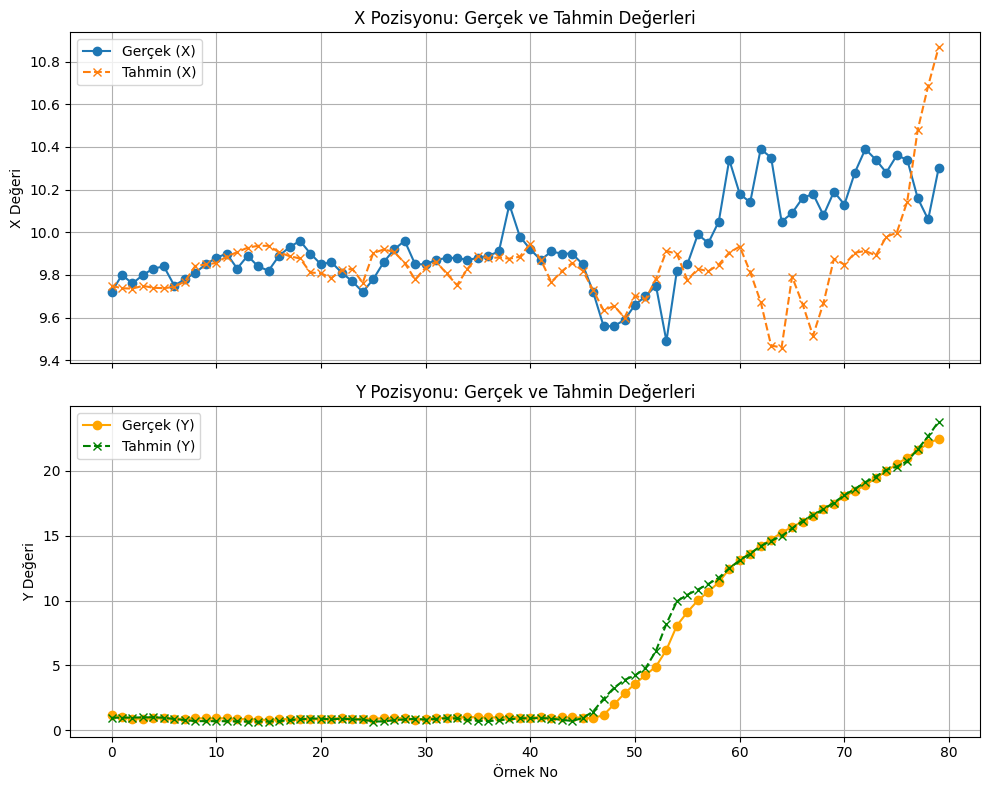

In [285]:
import numpy as np
import matplotlib.pyplot as plt

y_test_array = np.array(y_test[:80])  
test_predictions_array = np.array(test_predictions[:80]) 
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# x pozisyonu
axes[0].plot(range(80), y_test_array[:, 0], label="Gerçek (X)", marker='o')
axes[0].plot(range(80), test_predictions_array[:, 0], label="Tahmin (X)", linestyle='--', marker='x')
axes[0].set_title("X Pozisyonu: Gerçek ve Tahmin Değerleri")
axes[0].set_ylabel("X Değeri")
axes[0].legend()
axes[0].grid(True)

# y pozisyonu
axes[1].plot(range(80), y_test_array[:, 1], label="Gerçek (Y)", marker='o', color='orange')
axes[1].plot(range(80), test_predictions_array[:, 1], label="Tahmin (Y)", linestyle='--', marker='x', color='green')
axes[1].set_title("Y Pozisyonu: Gerçek ve Tahmin Değerleri")
axes[1].set_xlabel("Örnek No")
axes[1].set_ylabel("Y Değeri")
axes[1].legend()
axes[1].grid(True)

# Grafik gösterimi
plt.tight_layout()
plt.show()


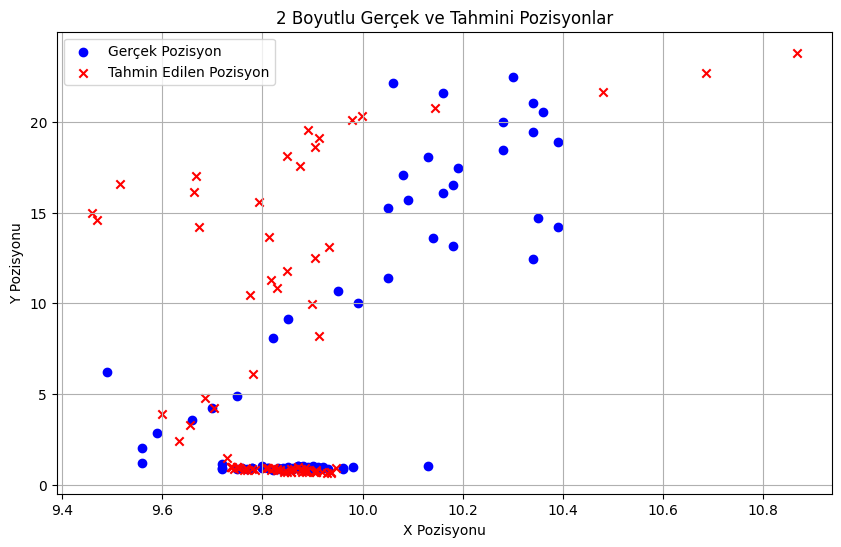

In [287]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_array[:, 0], y_test_array[:, 1], label="Gerçek Pozisyon", color='blue', marker='o')
plt.scatter(test_predictions_array[:, 0], test_predictions_array[:, 1], label="Tahmin Edilen Pozisyon", color='red', marker='x')


plt.title("2 Boyutlu Gerçek ve Tahmini Pozisyonlar")
plt.xlabel("X Pozisyonu")
plt.ylabel("Y Pozisyonu")
plt.legend()
plt.grid(True)

plt.show()


# yapılacak çok şey var 
